In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_json('/work/UniformityIllusion/jatos_results.txt',  lines=True)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,373,374,375,376,377,378,379,380,381,382
0,"{'url': {'srid': '33848'}, 'meta': {'labjs_ver...","{'sender': 'Depression Questionnaire', 'sender...","{'sender': 'Anxiety Questionnaire', 'sender_ty...","{'sender': 'Thanks for Filling Out Form', 'sen...","{'sender': 'Instructions', 'sender_type': 'htm...","{'sender': 'Test Trial Instructions', 'sender_...","{'sender': 'Fixation Cross', 'sender_type': 'h...","{'sender': 'cf keyframe transitions', 'sender_...","{'sender': 'Did You Look At the Cross?', 'send...","{'sender': 'Trial', 'sender_type': 'flow.Seque...",...,"{'sender': 'Data transmission (beta)', 'sender...","{'sender': 'Trial', 'sender_type': 'flow.Seque...","{'sender': 'Fixation Cross', 'sender_type': 'h...","{'sender': 'cf keyframe transitions', 'sender_...","{'sender': 'Did You Look At the Cross?', 'send...","{'sender': 'Data transmission (beta)', 'sender...","{'sender': 'Trial', 'sender_type': 'flow.Seque...","{'sender': 'Test Rounds', 'sender_type': 'flow...","{'sender': 'Thanks for Participating!', 'sende...","{'sender': 'root', 'sender_type': 'flow.Sequen..."
1,"{'url': {'srid': '33836'}, 'meta': {'labjs_ver...","{'sender': 'Depression Questionnaire', 'sender...","{'sender': 'Anxiety Questionnaire', 'sender_ty...","{'sender': 'Thanks for Filling Out Form', 'sen...","{'sender': 'Instructions', 'sender_type': 'htm...","{'sender': 'Test Trial Instructions', 'sender_...","{'sender': 'Fixation Cross', 'sender_type': 'h...","{'sender': 'cf keyframe transitions', 'sender_...","{'sender': 'Did You Look At the Cross?', 'send...","{'sender': 'Trial', 'sender_type': 'flow.Seque...",...,"{'sender': 'Data transmission (beta)', 'sender...","{'sender': 'Trial', 'sender_type': 'flow.Seque...","{'sender': 'Fixation Cross', 'sender_type': 'h...","{'sender': 'cf keyframe transitions', 'sender_...","{'sender': 'Did You Look At the Cross?', 'send...","{'sender': 'Data transmission (beta)', 'sender...","{'sender': 'Trial', 'sender_type': 'flow.Seque...","{'sender': 'Test Rounds', 'sender_type': 'flow...","{'sender': 'Thanks for Participating!', 'sende...","{'sender': 'root', 'sender_type': 'flow.Sequen..."
2,"{'url': {'srid': '33825'}, 'meta': {'labjs_ver...","{'sender': 'Depression Questionnaire', 'sender...","{'sender': 'Anxiety Questionnaire', 'sender_ty...","{'sender': 'Thanks for Filling Out Form', 'sen...","{'sender': 'Instructions', 'sender_type': 'htm...","{'sender': 'Test Trial Instructions', 'sender_...","{'sender': 'Fixation Cross', 'sender_type': 'h...","{'sender': 'cf keyframe transitions', 'sender_...","{'sender': 'Did You Look At the Cross?', 'send...","{'sender': 'Trial', 'sender_type': 'flow.Seque...",...,"{'sender': 'Data transmission (beta)', 'sender...","{'sender': 'Trial', 'sender_type': 'flow.Seque...","{'sender': 'Fixation Cross', 'sender_type': 'h...","{'sender': 'cf keyframe transitions', 'sender_...","{'sender': 'Did You Look At the Cross?', 'send...","{'sender': 'Data transmission (beta)', 'sender...","{'sender': 'Trial', 'sender_type': 'flow.Seque...","{'sender': 'Test Rounds', 'sender_type': 'flow...","{'sender': 'Thanks for Participating!', 'sende...","{'sender': 'root', 'sender_type': 'flow.Sequen..."
3,"{'url': {'srid': '33822'}, 'meta': {'labjs_ver...","{'sender': 'Depression Questionnaire', 'sender...","{'sender': 'Anxiety Questionnaire', 'sender_ty...","{'sender': 'Thanks for Filling Out Form', 'sen...","{'sender': 'Instructions', 'sender_type': 'htm...","{'sender': 'Test Trial Instructions', 'sender_...","{'sender': 'Fixation Cross', 'sender_type': 'h...","{'sender': 'cf keyframe transitions', 'sender_...","{'sender': 'Did You Look At the Cross?', 'send...","{'sender': 'Trial', 'sender_type': 'flow.Seque...",...,"{'sender': 'Data transmission (beta)', 'sender...","{'sender': 'Trial', 'sender_type': 'flow.Seque...","{'sender': 'Fixation Cross', 'sender_type': 'h...","{'sender': 'cf keyframe transitions', 'sender_...","{'sender': 'Did You Look At the Cross?', 'send...","{'sender':

ValidationError: 0 is not of type 'string'

Failed validating 'type' in schema[0]:
    {'type': 'string'}

On instance:
    0

In [9]:
#get the depression and anxiety scores summed up
for i in range(data.shape[0]):

    depression = data.iloc[i][1]
    for key, value in depression.items():
        value = str(value).replace('1a', '1').replace('1b', '1').replace('2a', '2').replace('2b', '2').replace('3a', '3').replace('3b', '3')
        depression[key] = value

    anxiety = data.iloc[i][2]
    depression_score = int(depression['Sadness']) + int(depression['Pessimism']) + int(depression['Past Failure']) + int(depression['Loss of Pleasure']) + int(depression['Guilty Feelings']) + int(depression['Punishment Feelings']) + int(depression['Self-Dislike']) + int(depression['Suicidal Thoughts or Wishes']) + int(depression['Crying']) + int(depression['Agitation']) + int(depression['Loss of Interest']) + int(depression['Indecisiveness']) + int(depression['Worthlessness']) + int(depression['Loss of Energy']) + int(depression['Changes in Sleeping Pattern']) + int(depression['Irritability']) + int(depression['Changes in Appetite']) + int(depression['Tiredness or Fatigue']) + int(depression['Loss of Interest in Sex']) 
    if "" in anxiety.values():
        anxiety_score = np.NaN
    else:
        anxiety_score = int(anxiety['Secure']) + int(anxiety['Worry']) + int(anxiety['Nervous']) + int(anxiety['Tension']) + int(anxiety['Calm']) + int(anxiety['Take Things Hard']) + int(anxiety['Self-Confidence']) + int(anxiety['Difficulties']) + int(anxiety['I Feel Blue']) + int(anxiety['Crying']) + int(anxiety['Disappointment']) + int(anxiety['Others Happy']) + int(anxiety['Satisfied']) + int(anxiety['Steady Person']) + int(anxiety["Can't Make Up Mind"]) + int(anxiety['I feel pleasant']) + int(anxiety['I tire quickly']) + int(anxiety['I feel rested'])
    depression['depression_score'] = depression_score
    anxiety['anxiety_score'] = anxiety_score
    data.iloc[i][1] = depression
    data.iloc[i][2] = anxiety


In [ ]:
clean_df = pd.DataFrame(columns=['Participant', 'Stimulus', 'Condition', 'uniformityOnsetTime', 'depression_score', 'anxiety_score'])

In [15]:
include_timeout_df = pd.DataFrame(columns=['Participant', 'Stimulus', 'Condition', 'uniformityOnsetTime', 'depression_score', 'anxiety_score', 'ended_on'])

In [ ]:
print(data.iloc[5][2])

{'sender': 'Anxiety Questionnaire', 'sender_type': 'html.Form', 'sender_id': '2', 'Secure': '3', 'Worry': '3', 'Nervous': '3', 'Tension': '2', 'Calm': '3', 'Take Things Hard': '1', 'Self-Confidence': '2', 'Difficulties': '1', 'I Feel Blue': '1', 'Crying': '1', 'Disappointment': '2', 'Others Happy': '1', 'Satisfied': '2', 'Steady Person': '3', "Can't Make Up Mind": '2', 'I feel pleasant': '2', 'I tire quickly': '1', 'I feel rested': '3', 'ended_on': 'form submission', 'duration': 78988.34400001192, 'time_run': 180997.20000004768, 'time_render': 180986.782, 'time_show': 181003.456, 'time_end': 259991.80000001192, 'time_commit': 259992, 'timestamp': '2021-07-21T01:13:43.768Z', 'time_switch': 260004.447, 'anxiety_score': 36}


In [8]:
#make clean df
for i in range(data.shape[0]): #for each row
    for j in range(1, data.shape[1]): #for each column entry in the row
        entry = data.iloc[i][j] #grab each entry
        if entry is None: #if there's no data for that trial, skip it
            break

        elif entry['sender'] == 'cf keyframe transitions' and j > 20: #if it's a test trial
            if data.iloc[i][j+1]['correct'] == False or entry['ended_on'] == 'timeout': #check the next screen to see if they looked away or didn't press anything
                break
            else:
                uniformityOnsetTime = entry['duration'] - entry['fadeTime'] #get how long it took for the illusion to take place
                entry['uniformityOnsetTime'] = uniformityOnsetTime #add uniformity onset time to the entry
                data.iloc[i][j] = entry #update data
                clean_df.loc[len(clean_df)] = [i, entry['b'][3:-5], entry['b'][-5], entry['uniformityOnsetTime'], data.iloc[i][1]['depression_score'], data.iloc[i][2]['anxiety_score']] #add row to cleaned dataframe
        else:
            pass

KeyError: 'depression_score'

In [16]:
#make df including timeout trials
for i in range(data.shape[0]): #for each row
    for j in range(1, data.shape[1]): #for each column entry in the row
        entry = data.iloc[i][j] #grab each entry
        if entry is None: #if there's no data for that trial, skip it
            break

        elif entry['sender'] == 'cf keyframe transitions' and j > 20: #if it's a test trial
            if data.iloc[i][j+1]['correct'] == False: #check the next screen to see if they looked away or didn't press anything
                break
            else:
                uniformityOnsetTime = entry['duration'] - entry['fadeTime'] #get how long it took for the illusion to take place
                entry['uniformityOnsetTime'] = uniformityOnsetTime #add uniformity onset time to the entry
                data.iloc[i][j] = entry #update data
                include_timeout_df.loc[len(include_timeout_df)] = [i, entry['b'][3:-5], entry['b'][-5], entry['uniformityOnsetTime'], data.iloc[i][1]['depression_score'], data.iloc[i][2]['anxiety_score'], entry['ended_on']] #add row to cleaned dataframe
        else:
            pass

In [17]:
#clean_df.to_csv('/work/UniformityIllusion/data.csv')
include_timeout_df.to_csv('/work/UniformityIllusion/include_timeout_data.csv')

In [18]:
include_timeout_df

,Participant,Stimulus,Condition,uniformityOnsetTime,depression_score,anxiety_score,ended_on
0,0,13,a,7167.20,1,39,response
1,0,7,b,5320.98,1,39,response
2,0,14,a,16394.78,1,39,response
3,0,8,b,3320.54,1,39,response
4,0,10,b,7111.90,1,39,response
...,...,...,...,...,...,...,...
18084,469,7,b,203.00,10,41,response
18085,469,15,a,225.00,10,41,response
18086,469,14,b,2070.00,10,41,response
18087,469,13,b,212.00,10,41,response


alt.Chart(...)

<AxesSubplot:xlabel='anxiety_score'>

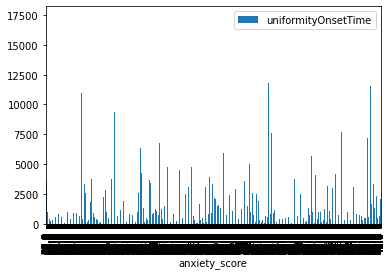

In [ ]:
clean_df.plot(x='anxiety_score', y='uniformityOnsetTime', kind='bar')

In [ ]:
clean_df_13 = clean_df[clean_df['Stimulus']=='13']

In [ ]:
clean_df['uniformityOnsetTime'].mean()

1952.9624091237827

In [ ]:
clean_df_13

,Participant,Stimulus,Condition,uniformityOnsetTime,depression_score,anxiety_score
0,0,13,a,7167.200,1,39
10,1,13,a,4186.860,10,39
58,6,13,a,6819.720,3,28
62,6,13,b,3564.620,3,28
90,14,13,b,32.034,7,47
...,...,...,...,...,...,...
6073,469,13,a,791.000,10,41
6106,469,13,b,441.000,10,41
6113,469,13,a,1040.000,10,41
6138,469,13,b,212.000,10,41


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b428ea16-8644-4725-b427-7c3182996c03' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>